In [19]:
s = 0.5
L = 1
h = 2.0^-3
ρ = 2.0^-6
R = 5
ε = 2*ρ;

In [20]:
# Shape function
function φ(x)
    if x < -1 
        return 0.0
    elseif x < 0
        return x+1
    elseif x < 1
        return 1-x
    else
        return 0
    end
end

# Basis function
hmesh = -(L-h):h:(L-h)
φ(x,i) = φ((x - hmesh[i])/h)*(-L < x < L)

φ (generic function with 2 methods)

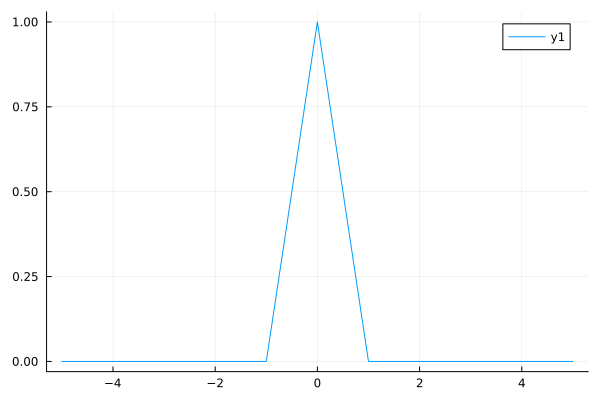

In [21]:
using Plots
plot(x->φ(x))

In [22]:
ρmesh = -R:ρ:R 

function a(i,j) 
    F(x,y) = (abs(x-y) > ε) * abs(x-y)^(-1-2*s)*(φ(x,i) - φ(y,i))*(φ(x,j) - φ(y,j))
    return ρ^2 * sum( F(x,y) for x in ρmesh, y in ρmesh)
end
@time a(1,2);

  0.248196 seconds (14.67 M allocations: 238.165 MiB, 4.83% gc time, 10.40% compilation time)


In [23]:
using Base.Threads
using LinearAlgebra

A = zeros(length(hmesh), length(hmesh)) 
@threads for i in eachindex(hmesh)
    for j = i:length(hmesh)
        A[i,j] = a(i,j)
    end
end
A = Symmetric(A)

15×15 Symmetric{Float64, Matrix{Float64}}:
  4.38256    -0.695161   -0.712481   …  -0.0139848  -0.0119039  -0.0102557
 -0.695161    4.38314    -0.695033      -0.0166651  -0.0139848  -0.0119039
 -0.712481   -0.695033    4.38361       -0.0201998  -0.0166651  -0.0139848
 -0.251578   -0.712481   -0.694928      -0.024997   -0.0201998  -0.0166651
 -0.133492   -0.251578   -0.712481      -0.031742   -0.024997   -0.0201998
 -0.0833504  -0.133492   -0.251578   …  -0.0416619  -0.031742   -0.024997
 -0.0571401  -0.0833504  -0.133492      -0.0571401  -0.0416619  -0.031742
 -0.0416619  -0.0571401  -0.0833504     -0.0833504  -0.0571401  -0.0416619
 -0.031742   -0.0416619  -0.0571401     -0.133492   -0.0833504  -0.0571401
 -0.024997   -0.031742   -0.0416619     -0.251578   -0.133492   -0.0833504
 -0.0201998  -0.024997   -0.031742   …  -0.712481   -0.251578   -0.133492
 -0.0166651  -0.0201998  -0.024997      -0.694928   -0.712481   -0.251578
 -0.0139848  -0.0166651  -0.0201998      4.38361    -0.695033

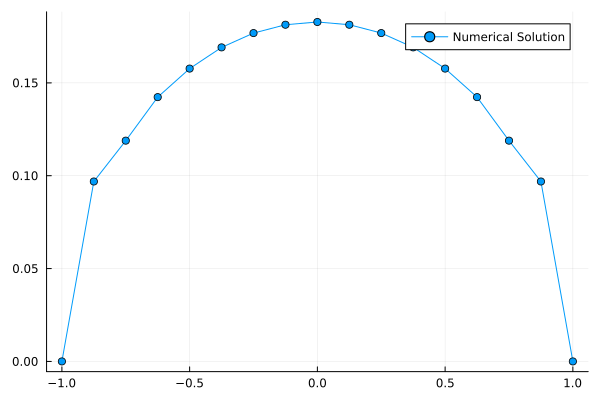

In [24]:
f(x) = 1.0
F = h*[f(x) for x in hmesh]

U = A \ F 

plot([-L; hmesh; L], [0; U; 0], label="Numerical Solution", marker=:circle)